# Exploratory Data Analysis

Exploratory Data Analysis is essentially the first step in actually working with a data set. As we gain more experience with data and the things that can happen you'll see more examples of what we are looking for. 

Two main items we are looking for:
- Can we identify features that are important in the prediction
- Can we identify features that are are related, particularly ones that are related to the outcome

Note that in both cases, we will eventually have some tools for at least to some extent automating the answering of these questions.

We have used Linear Regression a few times in making predictions, but note that sometimes the relationship is not linear, yet the same tool could be used.

Consider the abalone dataset.

In [1]:
import pandas as pa
import numpy as np
import seaborn as sn

In [4]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', 
                 names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight',
                                          'Rings'])

ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


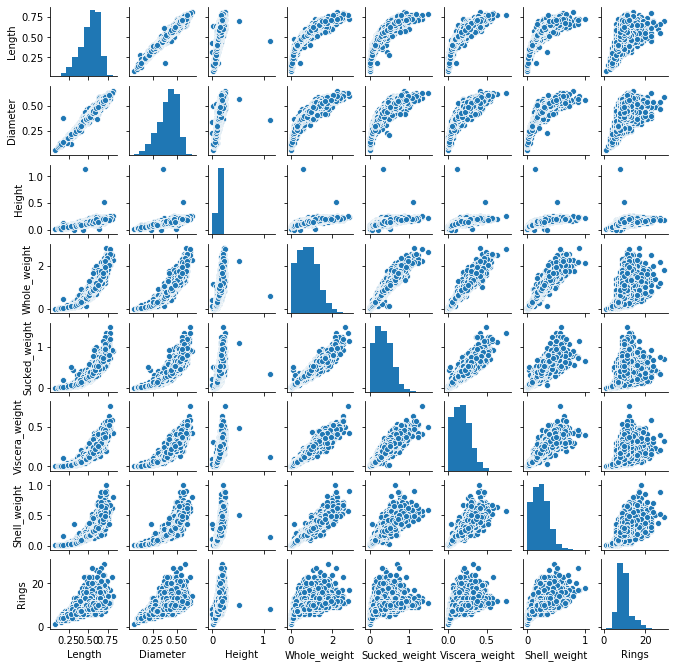

In [5]:
p = sn.pairplot(ab)
p.fig.set_size_inches(9, 9)

You might notice from the pairplots that it looks like there is a linear relationship between Length, Diameter, and Height. It is relatively robust. In fact we could apply our LinearRegression tool to it. 

In [18]:
import matplotlib.pyplot as plt
import numpy.random as rn
from sklearn.linear_model import LinearRegression

In [8]:
# Produce a numpy array with the Length variable and another with the Diameter

X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Diameter']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed

y = np.array(ab.loc[:, 'Length'])

In [13]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [17]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(0.03770427090837186, 1.1926324920437297)

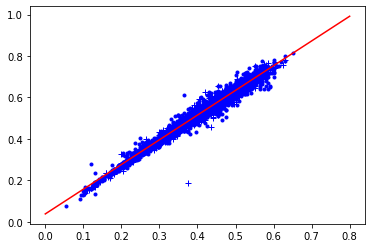

In [26]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-');

In [22]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.9754076196898986
The testing R2: 0.9670173331756137


These are relatively close to one, implying that the line does a reasonable job of explaining the variation in the data.

## Nonlinear Relations

Notice that a relationship between length and whole weight appears to exist, but that it is non-linear.

In [35]:
# Produce a numpy array with the Length variable and another with the Whole_Weight

X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Length']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed

y = np.array(ab.loc[:, 'Whole_weight'])

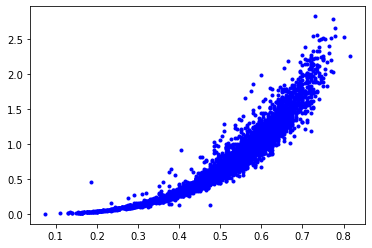

In [36]:
plt.plot(X, y, 'b.');

We could try using a quadratic relation such as $y = a x^2 + b x + c$. We could even do this with our existing Linear Regression tool by creating a new column with the values of $x^2$.

In [37]:
X2 = np.atleast_2d(np.array([x**2 for x in X]))
X = np.concatenate([X, X2], axis=1)

In [39]:
X[:10]

array([[0.455   , 0.207025],
       [0.35    , 0.1225  ],
       [0.53    , 0.2809  ],
       [0.44    , 0.1936  ],
       [0.33    , 0.1089  ],
       [0.425   , 0.180625],
       [0.53    , 0.2809  ],
       [0.545   , 0.297025],
       [0.475   , 0.225625],
       [0.55    , 0.3025  ]])

In [41]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [42]:
reg = LinearRegression().fit(X_train, y_train)

In [54]:
c, b, a = reg.intercept_, *reg.coef_
c, b, a

(0.44425907518676744, -3.2677756594665364, 7.259730150492895)

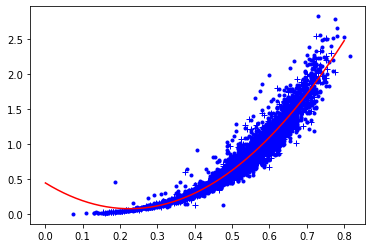

In [55]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = a*xx**2 + b*xx + c
plt.plot(xx, yy, 'r-');

In [56]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.9300406188486823
The testing R2: 0.9371531132743658
